<a href="https://colab.research.google.com/github/filipeselva/data-analisys-studies/blob/main/notebooks/supermarket-sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##About the dataset

**Context**

<p align=justify>The year is 2019. The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.</p><br>

**Attribute information**

- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer.
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash,Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)<br><br>


**Link to the DataSet:** [Supermarket sales - Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

##About the Analisys

**Context**

In this analisys the focus is comparing the data of the three branches and getting some insights about how to improve.

##Requirements

---



In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

In [ ]:
pip install --upgrade pandas

##Imports
---

In [ ]:
import pandas as pd
import numpy as np
import pandera as pa
import matplotlib.pyplot as plt
from google.cloud import storage
import os
import warnings                                         #To avoid any warnings
warnings.filterwarnings("ignore")

##Configs
---

###Pandas

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 30)

###Cloud Storage

In [ ]:
serviceAccount = '/content/delta-geode-377819-3faebb4b5477.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

client_gcloud = storage.Client()
bucket = client_gcloud.get_bucket('mr-jungle-01')
path = 'gs://mr-jungle-01/brutos/supermarket_sales - Sheet1.csv'

##File extraction, Slicing and Backup
---

In [ ]:
df = pd.read_csv(path, encoding='UTF-8')
df_backup = pd.read_csv(path, encoding='UTF-8')

In [ ]:
branch_a = df.loc[df['Branch'] == 'A']
branch_b = df.loc[df['Branch'] == 'B']
branch_c = df.loc[df['Branch'] == 'C']

##Pre-analisys
---

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()                                              # Eight numeric columns and nine text columns, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Observations**

- **Unit price** is minimum 10 and maximum 99.6 with an average of 55.
- **Tax** ranges from 0.5 to 49 dollars.
- **Minimum rating** is 4 and maximum rating is 10.
- **Total** Price ranges from 10 to 1042.

##Analisys by Branch

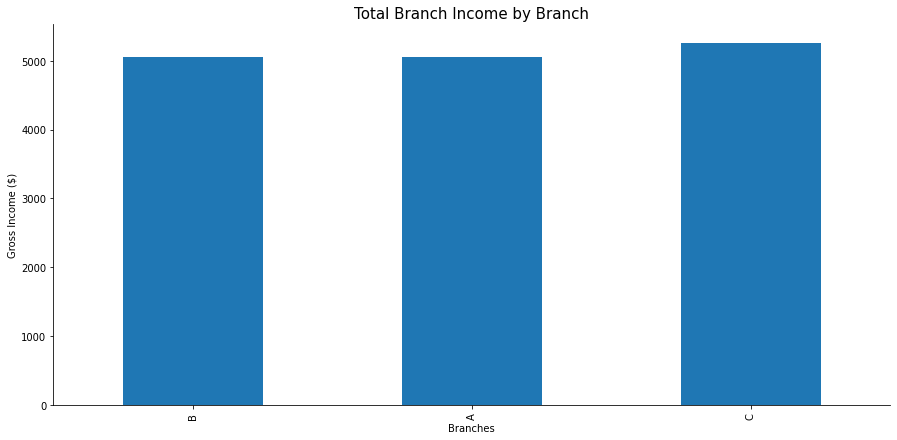

In [ ]:
df.groupby(['Branch'])['gross income'].sum().sort_values(ascending=True).plot.bar(figsize=(15,7), xlabel = 'Branches', ylabel = 'Gross Income ($)')

plt.title('Total Branch Income by Branch', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

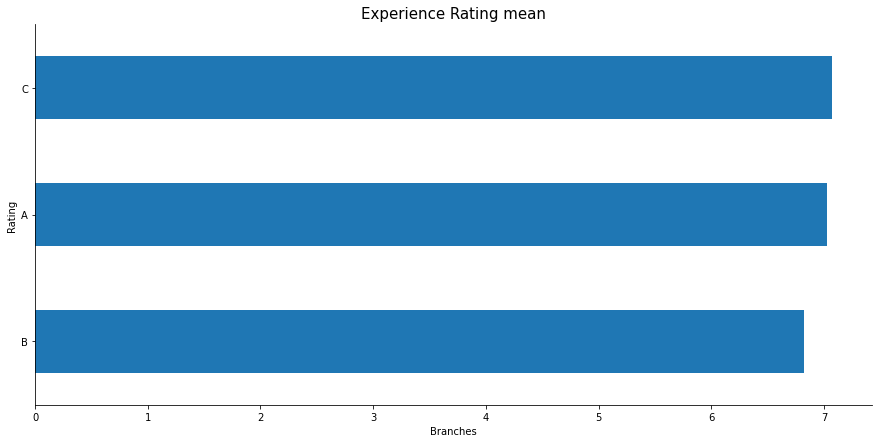

In [ ]:
df.groupby(['Branch'])['Rating'].mean().sort_values(ascending=True).plot.barh(figsize=(15,7), xlabel = 'Branches', ylabel = 'Rating')

plt.title('Experience Rating mean', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

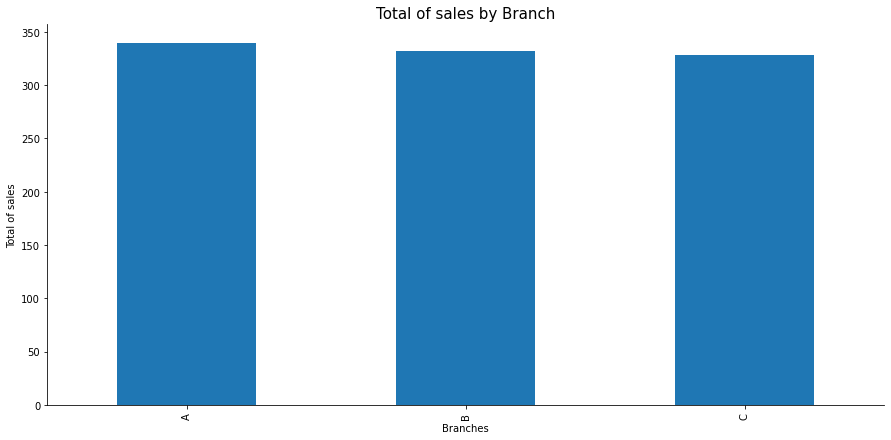

In [ ]:
df['Branch'].value_counts().plot.bar(figsize=(15,7), xlabel = 'Branches', ylabel = 'Total of sales')

plt.title('Total of sales by Branch', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

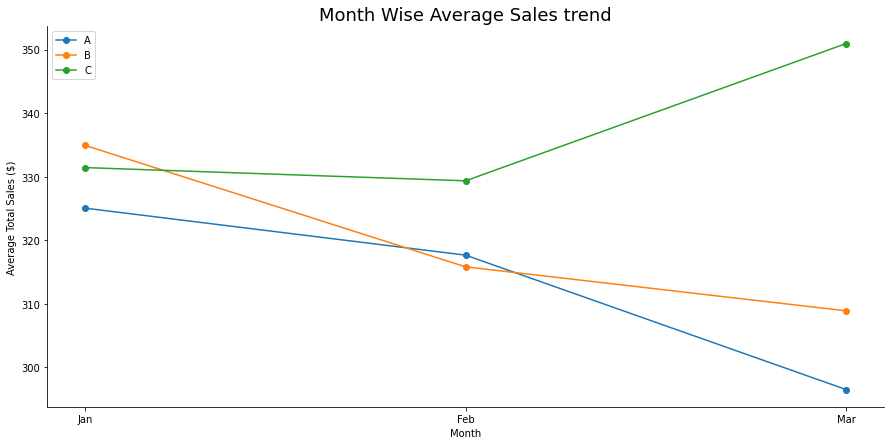

In [ ]:
a = branch_a.groupby(branch_a.Date.dt.month).mean()['Total']
b = branch_b.groupby(branch_b.Date.dt.month).mean()['Total']
c = branch_c.groupby(branch_c.Date.dt.month).mean()['Total']

ast = pd.DataFrame({
   'A': a,
   'B': b,
   'C': c
   })

ast.plot(kind='line', figsize=(15,7), marker='o')

xpoints =  [1,2,3]

#adding chart title
plt.title('Month Wise Average Sales trend', fontsize=18)
#Removing top and right spines in the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#adding axis labels
plt.xlabel('Month')
plt.ylabel('Average Total Sales ($)')
#Setting the x axis ticks rotation to 0
plt.xticks(ticks =[1,2,3], labels=['Jan', 'Feb', 'Mar'], rotation=0)
#Displaying the figure
plt.show()

**Observations**

- There is **downard trend** over the months in average total sales.